## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = mouse_metadata.merge(study_results, how = 'left', on = 'Mouse ID', sort = False)

# Display the data table for preview
#all_data.head()

all_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
mouse_count= len(all_data["Mouse ID"].unique())
mouse_count

249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. // # Optional: Get all the data for the duplicate mouse ID. 
duplicates = all_data[all_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates.head


<bound method NDFrame.head of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  >

In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = all_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last') 
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice in the clean DataFrame.
mouse_count2= len(clean_data["Mouse ID"].unique())
mouse_count2

249

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume

stats_df = clean_data.groupby('Drug Regimen')
mean = stats_df['Tumor Volume (mm3)'].mean()
median = stats_df['Tumor Volume (mm3)'].median()
var = stats_df['Tumor Volume (mm3)'].var()
stdev = stats_df['Tumor Volume (mm3)'].std()
sem = stats_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_table = pd.DataFrame({'Mean' : mean, 'Median': median, 'Variance' : var,
                             'Std. Deviation': stdev, 'SEM': sem})

summary_stats_table.round(2)



,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [53]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_table.aggregate({'Mean':['average'],
              'Median':['average'],
              'Variance':['average'], 
              'Std. Deviation':['average'],
                      'SEM':['average']}).round(2)

,Mean,Median,Variance,Std. Deviation,SEM
average,50.98,49.94,47.8,6.82,0.5


## Bar and Pie Charts

Text(0, 0.5, 'Dumber of Measurements ')

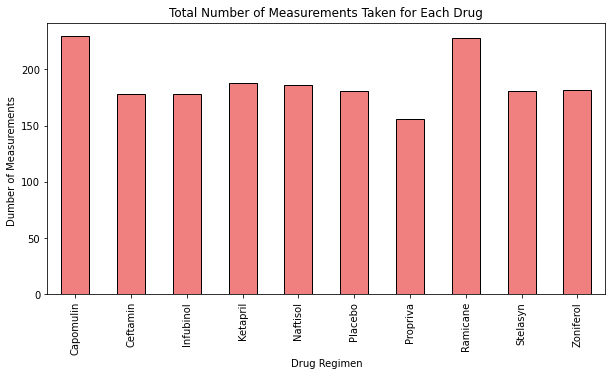

In [73]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Group the data by regimen
regimen_data = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

#Create plot
regimen_data.plot(kind="bar", figsize=(10,5), color = "lightcoral", edgecolor = "black")

#Create Labels
plt.title("Total Number of Measurements Taken for Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Dumber of Measurements ")

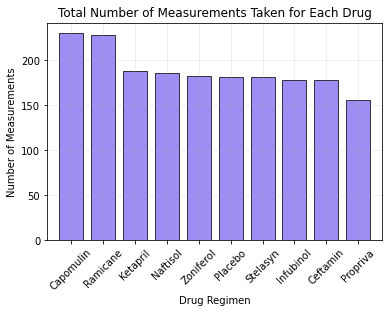

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
clean_data['Drug Regimen'].value_counts().plot(kind='bar', color='mediumslateblue', edgecolor = 'black', align='center', alpha=.75,
                                                    rot=45, width=.75)
plt.grid(alpha=.25)
plt.xlim(-0.75, len(clean_data['Drug Regimen'].value_counts())-0.25)
plt.title("Total Number of Measurements Taken for Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()


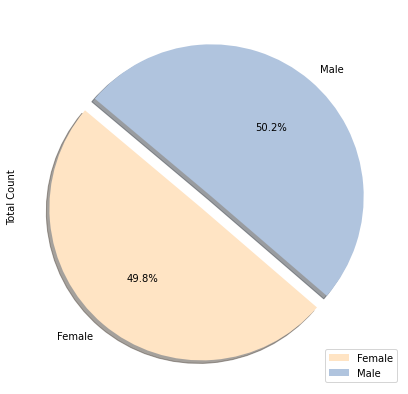

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by Gender
gender_groups = clean_data.groupby(["Mouse ID","Sex"])

mouse_gender = pd.DataFrame(gender_groups.size())

#Get total counts of Male and Female Mice
mouse_gender = pd.DataFrame(mouse_gender.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#Creating Pie Chart
colors = ['bisque', 'lightsteelblue']
explode = (0.10, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(7,7), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
